# <center> Bengaluru Real Estate Price Prediction</center>

In this notebook, we will be analyzing the properties in Bengaluru from a dataset last verified in 2017.

## List Of Contents
* Introduction
* Data Extraction
* Data Transformation and Cleaning
* Data Visualization
* Important Observations
* Conclusion

## Introduction

Now with the lingering impact of demonetization, the enforcement of the Real Estate (Regulation and Development) Act (RERA), and the lack of trust in property developers in the city, housing units sold across India in 2017 dropped by 7 percent. In fact, the property prices in Bengaluru fell by almost 5 percent in the second half of 2017, said a study published by property consultancy Knight Frank.
For example, for a potential homeowner, over 9,000 apartment projects and flats for sale are available in the range of ₹42-52 lakh, followed by over 7,100 apartments that are in the ₹52-62 lakh budget segment, says a report by property website Makaan. According to the study, there are over 5,000 projects in the ₹15-25 lakh budget segment followed by those in the ₹34-43 lakh budget category.
### Data taken from : [Kaggle](https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data)
#### Assumption
1. People are not looking at buying property less than 500 sq.ft
2. Properties' details such as Plot Area, Built-up area were ignored. 
3. Variables such as crime in the locality, parks, sanitation and median household income were not considered

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
cmap = plt.get_cmap("tab20c")
# for graph aesthetics 
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))
plt.style.use('dark_background')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}
matplotlib.rc('font', **font)

### Data Extraction


In [2]:
df1 = pd.read_csv('house_data.csv')
print('Data was identified and read successfully!')

Data was identified and read successfully!


In [3]:
df1.head() #reading the first 5 elements of our data 

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df1.shape #number of rows and columns

(13320, 9)

In [6]:
df1.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

### Data Transformation and Cleaning

In [7]:
df = df1.drop(['society','area_type', 'availability'], axis = 'columns') #removing society and area_type column
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [8]:
df.isnull().sum() # checking for any null entries in the data

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
df = df.dropna() # deleting the NanNs
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [10]:
df.shape #checking for the number of rows and coloumns again after deleting the null entries

(12710, 6)

In [11]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [12]:
df['BHK'] = df.loc[:,'size'].apply(lambda x : int(x.split(' ')[0])) # extracting the number of BHK from size column

In [13]:
df.head(5)

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [14]:
df['BHK'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [15]:
df[df.BHK>20]

,location,size,total_sqft,bath,balcony,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [16]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def is_float(x): #converting total_sqft from string to float
    try:
        float(x)
    except:
        return False
    return True

df[~df['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


In [18]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

In [19]:
df.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [20]:
df.loc[30] # testing it out for a random entry

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
balcony               0
price               186
BHK                   4
Name: 30, dtype: object

In [21]:
df['price/sqft'] =  df['price']*100000/ df['total_sqft'] #calculating price/sqft
df['price/sqft'] = df['price/sqft'].round(4)
df.head(10)

,location,size,total_sqft,bath,balcony,price,BHK,price/sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.8106
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.3846
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.5556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.8909
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.0000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.8632
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.2443
10,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3,3888.8889
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.4596
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,3800.0000


In [22]:
len(df['location'].unique())

1265

In [23]:
df.location = df.location.apply(lambda x: x.strip())

location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                              515
Sarjapur  Road                          372
Electronic City                         302
Kanakpura Road                          261
Thanisandra                             234
                                       ... 
Kodanda Reddy Layout                      1
Kirloskar layout, Basaveshwarnagar        1
Kengeri Satellite Town Stage II           1
Kengeri Satellite Town KHB Apartment      1
1 Annasandrapalya                         1
Name: location, Length: 1254, dtype: int64

In [24]:
len(location_stats[location_stats<=10])

1017

In [25]:
location_stats_less_then_10 = location_stats[location_stats<=10]
location_stats_less_then_10

location
Kalkere                                 10
Dairy Circle                            10
1st Block Koramangala                   10
Ganga Nagar                             10
Basapura                                10
                                        ..
Kodanda Reddy Layout                     1
Kirloskar layout, Basaveshwarnagar       1
Kengeri Satellite Town Stage II          1
Kengeri Satellite Town KHB Apartment     1
1 Annasandrapalya                        1
Name: location, Length: 1017, dtype: int64

In [26]:
df['price/sqft'].describe().map(int)

count      12668
mean        6876
std        22633
min          267
25%         4242
50%         5376
75%         7142
max      2300000
Name: price/sqft, dtype: int64

## Data Visualization

### Most number of properties available in Bengaluru

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


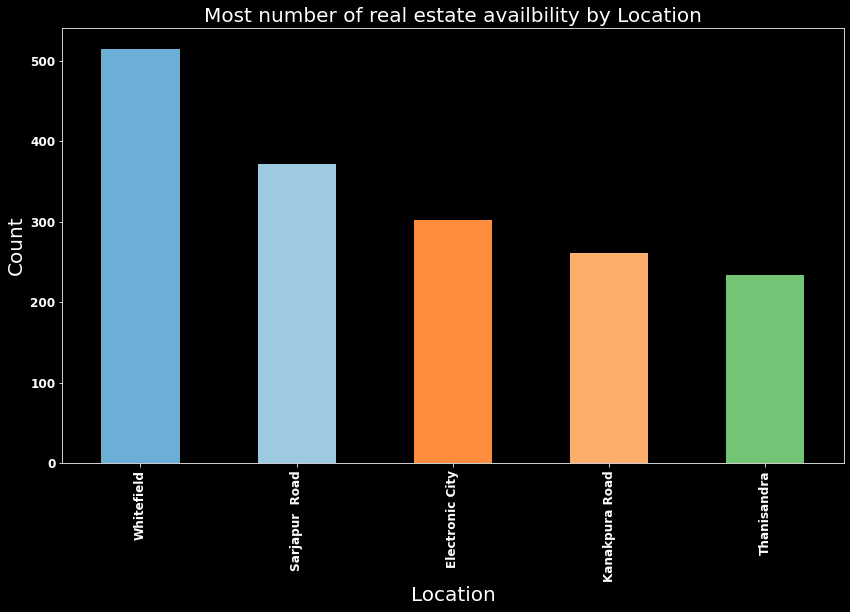

In [27]:
ax = df['location'].value_counts().head(5).plot(kind='bar',
                                    figsize=(14,8),  
                                    color =inner_colors,)
ax.set_xlabel("Location", size =20)
ax.set_ylabel("Count", size =20)
ax.set_title("Most number of real estate availbility by Location", size =20)
ax.figure.savefig('availability.png', dpi=300, bbox_inches='tight')

### Whitefield has more than 500 properties up for sale in Bengaluru

### Further analyzing Whitefield we see that, 3 BHK properties range from 1500-3500 sqft

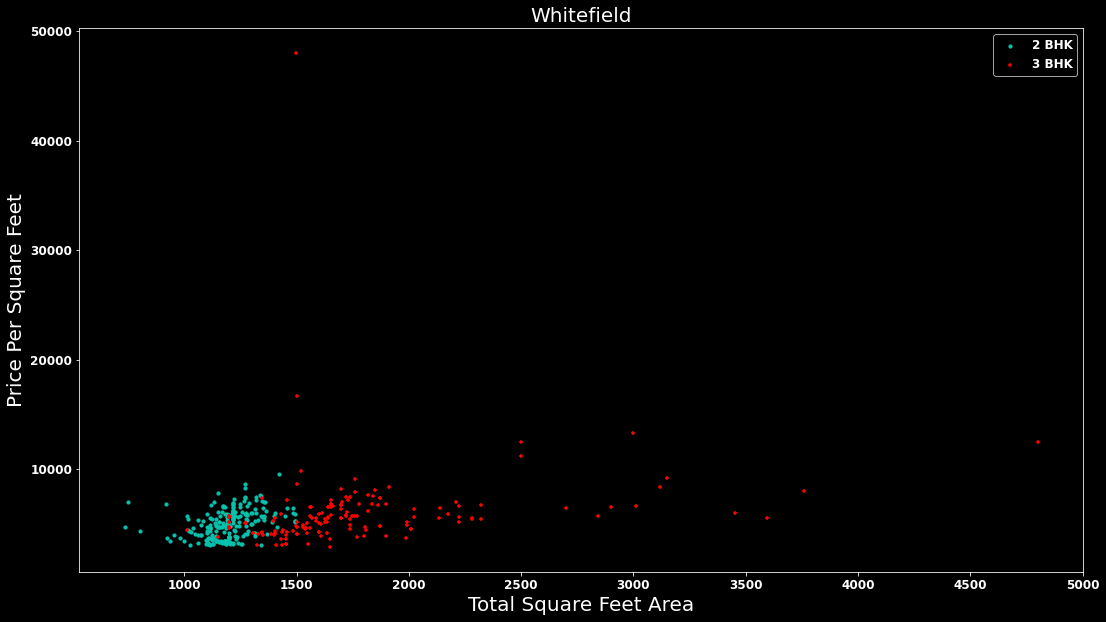

In [28]:
def scatter_plot(df,location):
    bhk2 = df[(df.location == location) & (df.BHK==2)]
    bhk3 = df[(df.location == location) & (df.BHK==3)]
    plt.figure(figsize=(18,10))
    plt.scatter(bhk2.total_sqft,bhk2['price/sqft'],color='#06c2ac',label='2 BHK', s=10)
    plt.scatter(bhk3.total_sqft,bhk3['price/sqft'],marker='+',color='red',label='3 BHK', s=10)
    plt.xlabel('Total Square Feet Area', size =20)
    plt.ylabel('Price Per Square Feet', size =20)
    plt.title(location , size =20)
    plt.legend()
    plt.savefig('whitefield.png', dpi=300, bbox_inches='tight')
    plt.show()

scatter_plot(df,'Whitefield') # instance


### Real Estate in Bengaluru according to Floor Area

In [29]:
# create seprate dataframes according to sqft
a = df[(df['total_sqft']>100) & (df['total_sqft']<1000)]
b = df[(df['total_sqft']>1001) & (df['total_sqft']<2000)]
c = df[(df['total_sqft']>2001) & (df['total_sqft']<3001)]
d = df[ (df['total_sqft']<1000)]
a = a.count()['total_sqft']
b = b.count()['total_sqft']
c = c.count()['total_sqft']
d = d.count()['total_sqft']

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


<Figure size 864x432 with 0 Axes>

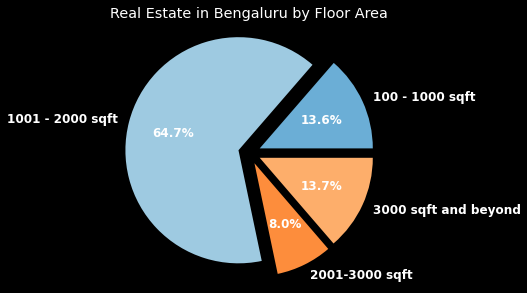

In [30]:
labels =['100 - 1000 sqft', '1001 - 2000 sqft', '2001-3000 sqft', '3000 sqft and beyond']
sizes = [a,b,c,d]
plt.figure(figsize=(12,6))
fig1, ax1 = plt.subplots()
explode = (0.1, 0.1, 0.1, 0.1)  
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',colors=inner_colors, explode= explode )
ax1.axis('equal')  
plt.tight_layout()
plt.title('Real Estate in Bengaluru by Floor Area')
plt.savefig('floor_area.png', dpi=300, bbox_inches='tight')
plt.show()


### We see that most of the properties in Bengaluru fall in the 1001-2000 sqft bracket

### Most expensive areas

In [31]:
areas = df.sort_values('price/sqft', ascending = False)
areas= areas[areas['price/sqft'] < 20000]
areas = areas.head(5)
areas

,location,size,total_sqft,bath,balcony,price,BHK,price/sqft
2799,Sarjapur Road,4 Bedroom,1152.0,4.0,1.0,230.0,4,19965.2778
12742,Vasanth nagar,4 BHK,4750.0,6.0,1.0,948.0,4,19957.8947
8682,Yemlur,4 Bedroom,8400.0,5.0,2.0,1675.0,4,19940.4762
3697,Yelahanka,4 Bedroom,4025.0,5.0,3.0,800.0,4,19875.7764
9831,Koramangala,4 Bedroom,1410.0,2.0,0.0,280.0,4,19858.1560


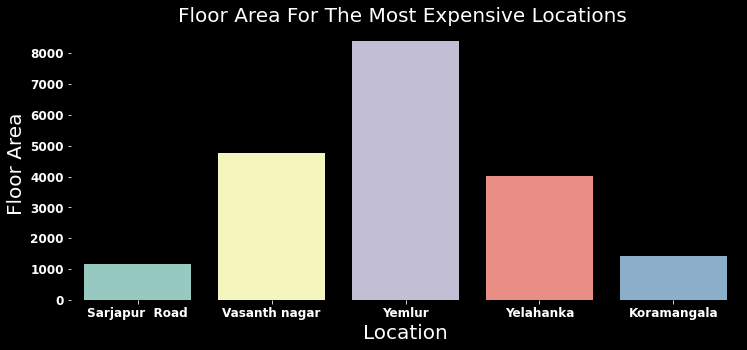

In [32]:
plt.figure(figsize=(12,5))
floor_area = sns.barplot(y=areas['total_sqft'],
           x = areas['location'],
           data = areas).set_title('Floor Area For The Most Expensive Locations ',size =20)
sns.despine(left=True, bottom = True)
plt.xlabel("Location",size=20)
plt.ylabel("Floor Area", size=20)
plt.savefig('floorarea_expensive.png', dpi=300, bbox_inches='tight')


### For a 4 BHK, Yemlur proved to be the most expensive location having an area of 8400 sqft

### Cheapest Areas

In [33]:
areas_min = df.sort_values('price/sqft', ascending = True)
areas_min = areas_min[areas_min['price/sqft'] < 1000]
areas_min = areas_min.head(6)
areas_min

,location,size,total_sqft,bath,balcony,price,BHK,price/sqft
1894,Nelamangala,3 Bedroom,52272.0,2.0,1.0,140.0,3,267.8298
674,Yelahanka,3 BHK,35000.0,3.0,3.0,130.0,3,371.4286
5393,Doddabommasandra,9 BHK,42000.0,8.0,3.0,175.0,9,416.6667
11748,Begur,3 BHK,2400.0,3.0,2.0,12.0,3,500.0000
7242,Yelahanka,1 Bedroom,26136.0,1.0,0.0,150.0,1,573.9210
810,4 Bedroom Farm House in Bagalur,4 Bedroom,10961.0,4.0,1.0,80.0,4,729.8604


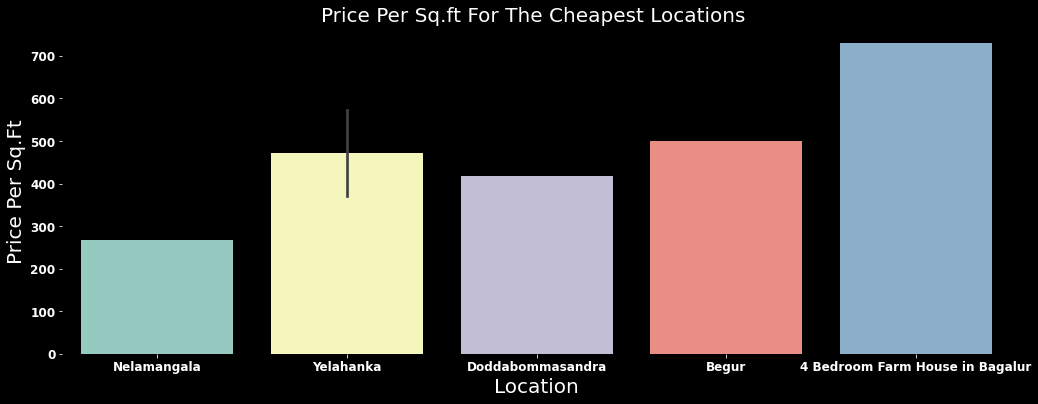

In [34]:
plt.figure(figsize=(17,6))
floor_area_min = sns.barplot(y=areas_min['price/sqft'],
           x = areas_min['location'],
           data = areas_min).set_title('Price Per Sq.ft For The Cheapest Locations ',size =20)
sns.despine(left=True, bottom = True)
plt.ylabel("Price Per Sq.Ft",size=20)
plt.xlabel("Location", size=20)
plt.savefig('cheapest.png', dpi=300, bbox_inches='tight')

### Nelamangala proved to be the most cheapest location with having Rs.267 / sqft

In [35]:
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_then_10 else x)
len(df.location.unique())

238

### Observation : There are 238 unique localities situated in Bengaluru
#### Assumption : Localities with less than 10 counts were ignored

### Data Cleaning

In this section, we will find outliers and try to remove them.

In [36]:
# removing outliers to improve prediction
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price/sqft'])
        st = np.std(subdf['price/sqft'])
        reduced_df = subdf[(subdf['price/sqft']>(m-st)) & (subdf['price/sqft']<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df= remove_pps_outliers(df)
df.shape

(10817, 8)

In [37]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price/sqft']),
                'std': np.std(bhk_df['price/sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price/sqft']<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [38]:
df = remove_bhk_outliers(df)
df.shape

(7552, 8)

In [39]:
df = df.drop(["price/sqft", 'size'],axis='columns')
df.head()

,location,total_sqft,bath,balcony,price,BHK
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1200.0,6.0,2.0,125.0,6
3,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
4,1st Block Jayanagar,930.0,4.0,2.0,85.0,7



## Creating Dummies¶

We will use pandas' get_dummies() to create dummies variables. It is used for data manipulation. It converts categorical data into dummy or indicator variables.


In [40]:
dummies = pd.get_dummies(df.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df = pd.concat([df,dummies.drop('other',axis='columns')],axis='columns')

In [42]:
df.head(10)

,location,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1200.0,6.0,2.0,125.0,6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,930.0,4.0,2.0,85.0,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1st Block Jayanagar,2750.0,4.0,0.0,413.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Block Jayanagar,2450.0,4.0,2.0,368.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1st Phase JP Nagar,1875.0,3.0,1.0,167.0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df = df.drop('location', axis='columns')
df.head()

,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,2.0,125.0,6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,2.0,85.0,7,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting Data for Training and Testing

In [44]:
X = df.drop('price',axis='columns')
X.head()

,total_sqft,bath,balcony,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,2.0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,2.0,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
y = df.price

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

## Training The Models

In [47]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7095789289717735

In [48]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.73210803, 0.68191523, 0.64832208, 0.74802712, 0.6386838 ])

In [49]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression':{
            'model': LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model': Lasso(),
            'params':{
                'alpha' : [1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [50]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.689811,{'normalize': False}
1,lasso,0.594767,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.437969,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


## Prediction

In [51]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

In [80]:
amount = predict_price( 'Begur',1999, 2, 3).round(2) # emter location, area, bath, bhk in order to get the predicted result
print(f'The amount to be paid according to your needs is : Rs. {amount} lakhs')

The amount to be paid according to your needs is : Rs. 131.74 lakhs


## Conclusion :
* The model was 69% accurate which means critical conditions had to be made to remove outliers which would have improved our best score
